In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

(Text(0.5, 1.0, 'Result Image'), ([], []), ([], []))

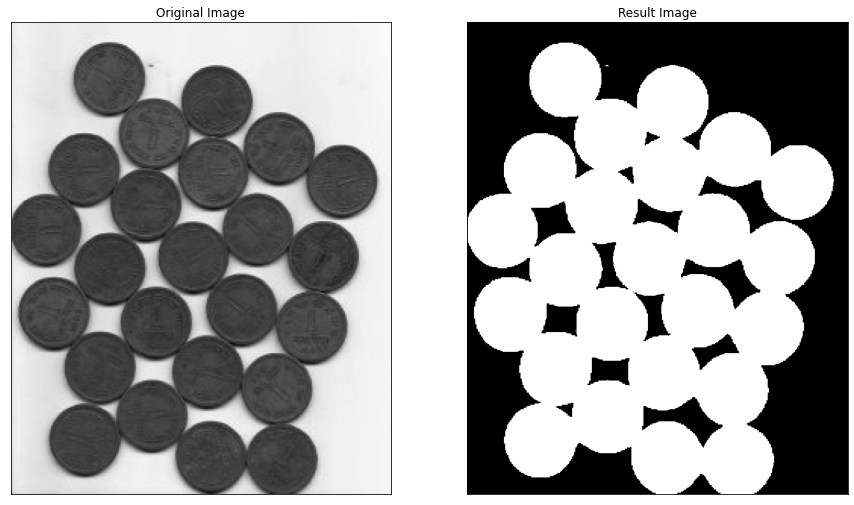

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(gray,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh, cmap='gray')
plt.title('Result Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [ ]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

(Text(0.5, 1.0, 'Result Image'), ([], []), ([], []))

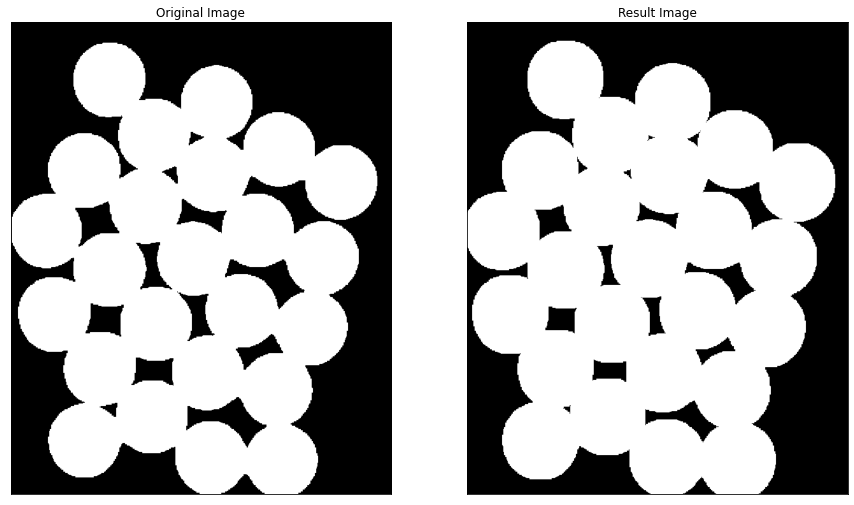

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(opening,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sure_bg, cmap='gray')
plt.title('Result Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

(Text(0.5, 1.0, 'Result Image'), ([], []), ([], []))

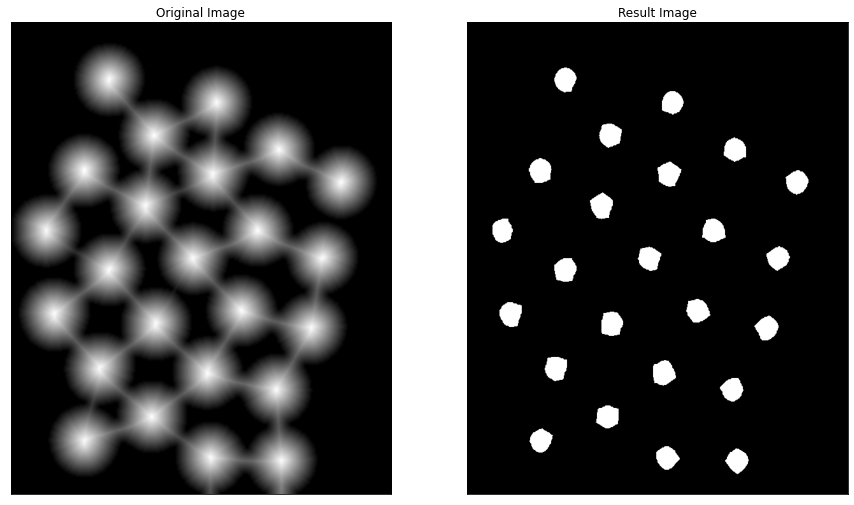

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(dist_transform,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sure_fg, cmap='gray')
plt.title('Result Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

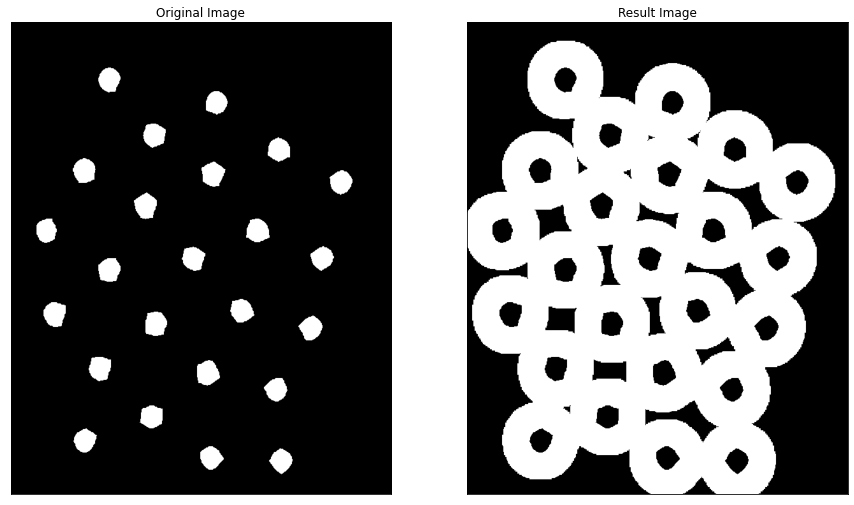

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(sure_fg,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(unknown, cmap='gray')
plt.title('Result Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


In [15]:
print(markers.shape)

(742, 598)


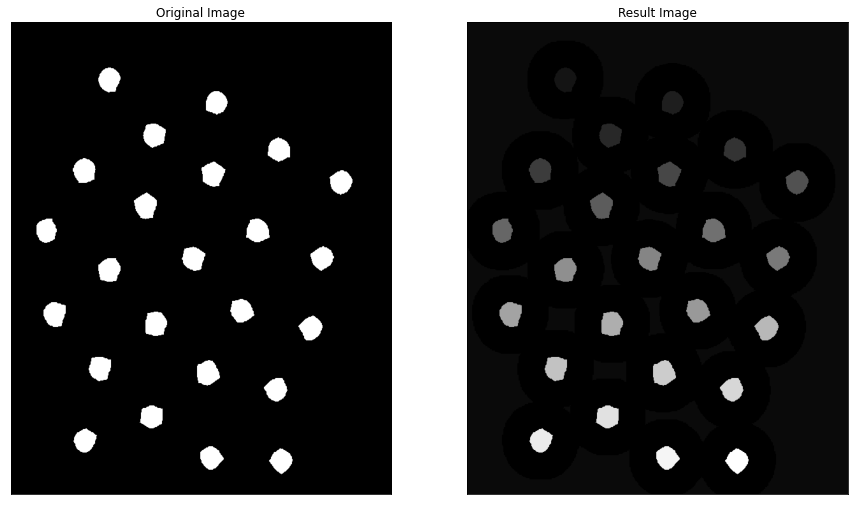

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(sure_fg,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(markers, cmap='gray')
plt.title('Result Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

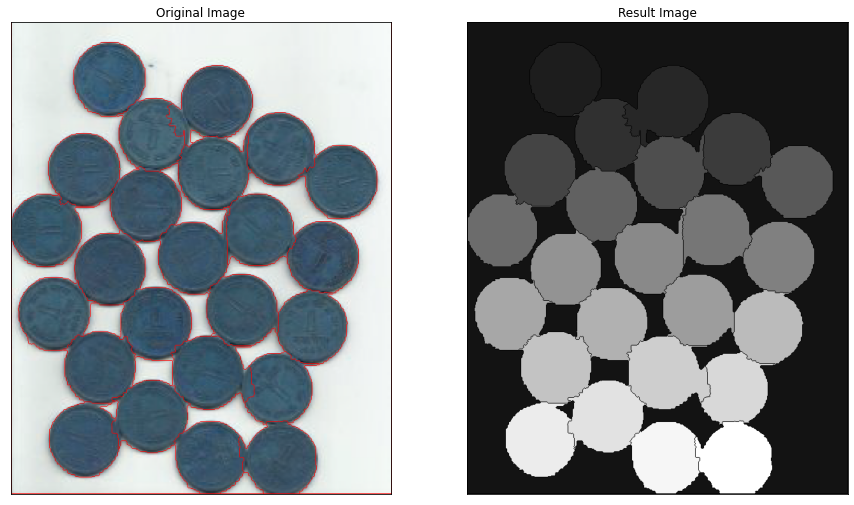

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(markers, cmap='gray')
plt.title('Result Image'), plt.xticks([]), plt.yticks([])
plt.show()
# grayscale이 index number이다.

In [ ]:
# HW : Hough Line으로 문서의 모서리 찾기